In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns
from sklearn.preprocessing import normalize
# label encoding the data 
from sklearn.preprocessing import LabelEncoder  

In [264]:
malldata = pd.read_csv(r'C:\Users\Sarvesh\Desktop\ML_submission\assignment_shala_clustering.csv')
le = LabelEncoder() 
  
malldata['Gender']= le.fit_transform(malldata['Gender']) 
#source -->https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

In [265]:
malldata=malldata.to_numpy()

In [266]:
malldata[0]

array([ 1,  1, 19, 15, 39], dtype=int64)

In [267]:
malldata[1]

array([ 2,  1, 21, 15, 81], dtype=int64)

In [268]:
#male has been assigned 1 so female will be zero .

In [269]:
malldata[:,1].sum()#number of males 

88

In [270]:
a=malldata[:,1]==0#cross checking to ensure the number of females should be 112 because total is 200 

In [271]:
sum(a)

112

In [272]:
#https://note.nkmk.me/en/python-numpy-delete/#:~:text=Using%20the%20NumPy%20function%20np,from%20the%20NumPy%20array%20ndarray%20.&text=Specify%20the%20axis%20(dimension)%20and,a%20slice%20or%20a%20list.
malldata=np.delete(malldata,0,1)

In [273]:
#malldata = normalize(malldata, axis=0, norm='max')

In [274]:
malldata[:10,]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40],
       [ 0, 22, 17, 76],
       [ 0, 35, 18,  6],
       [ 0, 23, 18, 94],
       [ 1, 64, 19,  3],
       [ 0, 30, 19, 72]], dtype=int64)

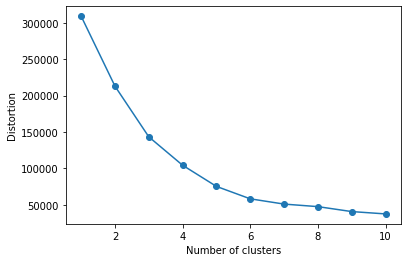

In [275]:
from sklearn import cluster
distortions = []
for i in range(1, 11):
    km = cluster.KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=1000,
        tol=1e-04, random_state=0
    )
    km.fit(malldata)
    distortions.append(km.inertia_)
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


In [276]:
km = cluster.KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=1000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)#we have predicted the cluster labels y_km
from sklearn.decomposition import PCA as sklearnPCA

In [277]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(malldata))
#transformed = pd.DataFrame(malldata)
print(y_km)

[2 2 1 3 1 3 1 3 0 3 0 3 1 3 0 2 1 2 0 3 0 2 1 2 1 2 1 2 1 3 0 3 0 2 1 3 1
 3 1 3 1 2 0 3 1 3 1 3 1 1 1 2 3 0 1 0 1 0 3 0 0 2 1 1 0 2 1 1 2 1 0 1 1 1
 0 2 1 0 3 1 0 2 0 1 3 0 1 3 3 1 1 2 0 1 1 2 1 3 0 2 1 1 0 2 0 3 1 0 0 0 0
 3 1 2 3 3 1 1 1 1 2 1 3 2 1 3 0 2 0 2 0 2 1 3 0 3 1 2 0 3 1 2 1 3 0 2 0 3
 1 2 0 2 1 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 1 2 0 2 0 2 1 3 0 2 0 2 1 3 0 3 1
 2 1 2 1 3 1 3 0 3 1 3 1 2 0 2]


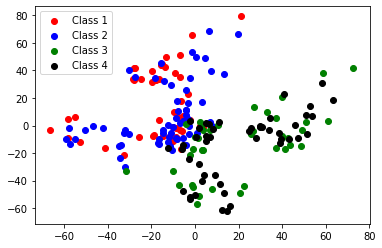

In [278]:
plt.scatter(transformed[y_km==0][0], transformed[y_km==0][1], label='Class 1', c='red')
plt.scatter(transformed[y_km==1][0], transformed[y_km==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y_km==2][0], transformed[y_km==2][1], label='Class 3', c='green')
plt.scatter(transformed[y_km==3][0], transformed[y_km==3][1], label='Class 4', c='black')
#plt.scatter(transformed[y_km==5][0], transformed[y_km==5][1], label='Class 5', c='grey')

plt.legend()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA